## Contents
* Support Vector Machine


## References
* https://scikit-learn.org/stable/modules/svm.html,  
* https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html  
* https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py




#### Example
1. imbalanced dataset 생성 및 SVM "C" 파라미터를 이용한 결과 비교  
2. non linear dataset 에 대한 kernel 선택 및 "gamma", "C" 파라미터에 따른 결과 비교  
3. iris dataset 에 대한 classfication 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics


#### 1. imbalanced data 를 생성하고, SVM 의 parameter "C" 를 조정하여 주어진 label 과 예측값과의 차이 비교해 보자.

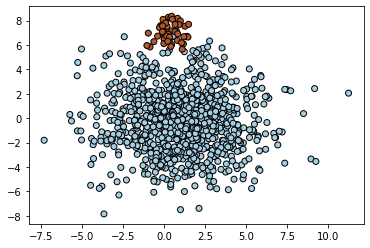

In [3]:
# generate imbalanced data
# n_samples_1 : n_samples_2 = 1000:50

n_samples_1 = 1000
n_samples_2 = 50
centers = [[1.0, 0.0], [0.0, 7.0]]
clusters_std = [2.5, 0.8]

# Generate isotropic gaussian blobs
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                 centers=centers,
                 cluster_std=clusters_std,
                 random_state=2,
                 shuffle=False)

# display sample_1 (blue) & sample (red)
plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

# split train/test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

confusion matrix (C: 0.1) 
 [[300   0]
 [ 15   0]]
confusion matrix (C: 0.5) 
 [[299   1]
 [  2  13]]
confusion matrix (C: 0.8) 
 [[299   1]
 [  1  14]]
confusion matrix (C: 0.9) 
 [[299   1]
 [  1  14]]
confusion matrix (C: 1) 
 [[299   1]
 [  0  15]]
confusion matrix (C: 1.5) 
 [[299   1]
 [  0  15]]
confusion matrix (C: 2) 
 [[299   1]
 [  0  15]]
confusion matrix (C: 3) 
 [[298   2]
 [  0  15]]
confusion matrix (C: 10) 
 [[294   6]
 [  0  15]]


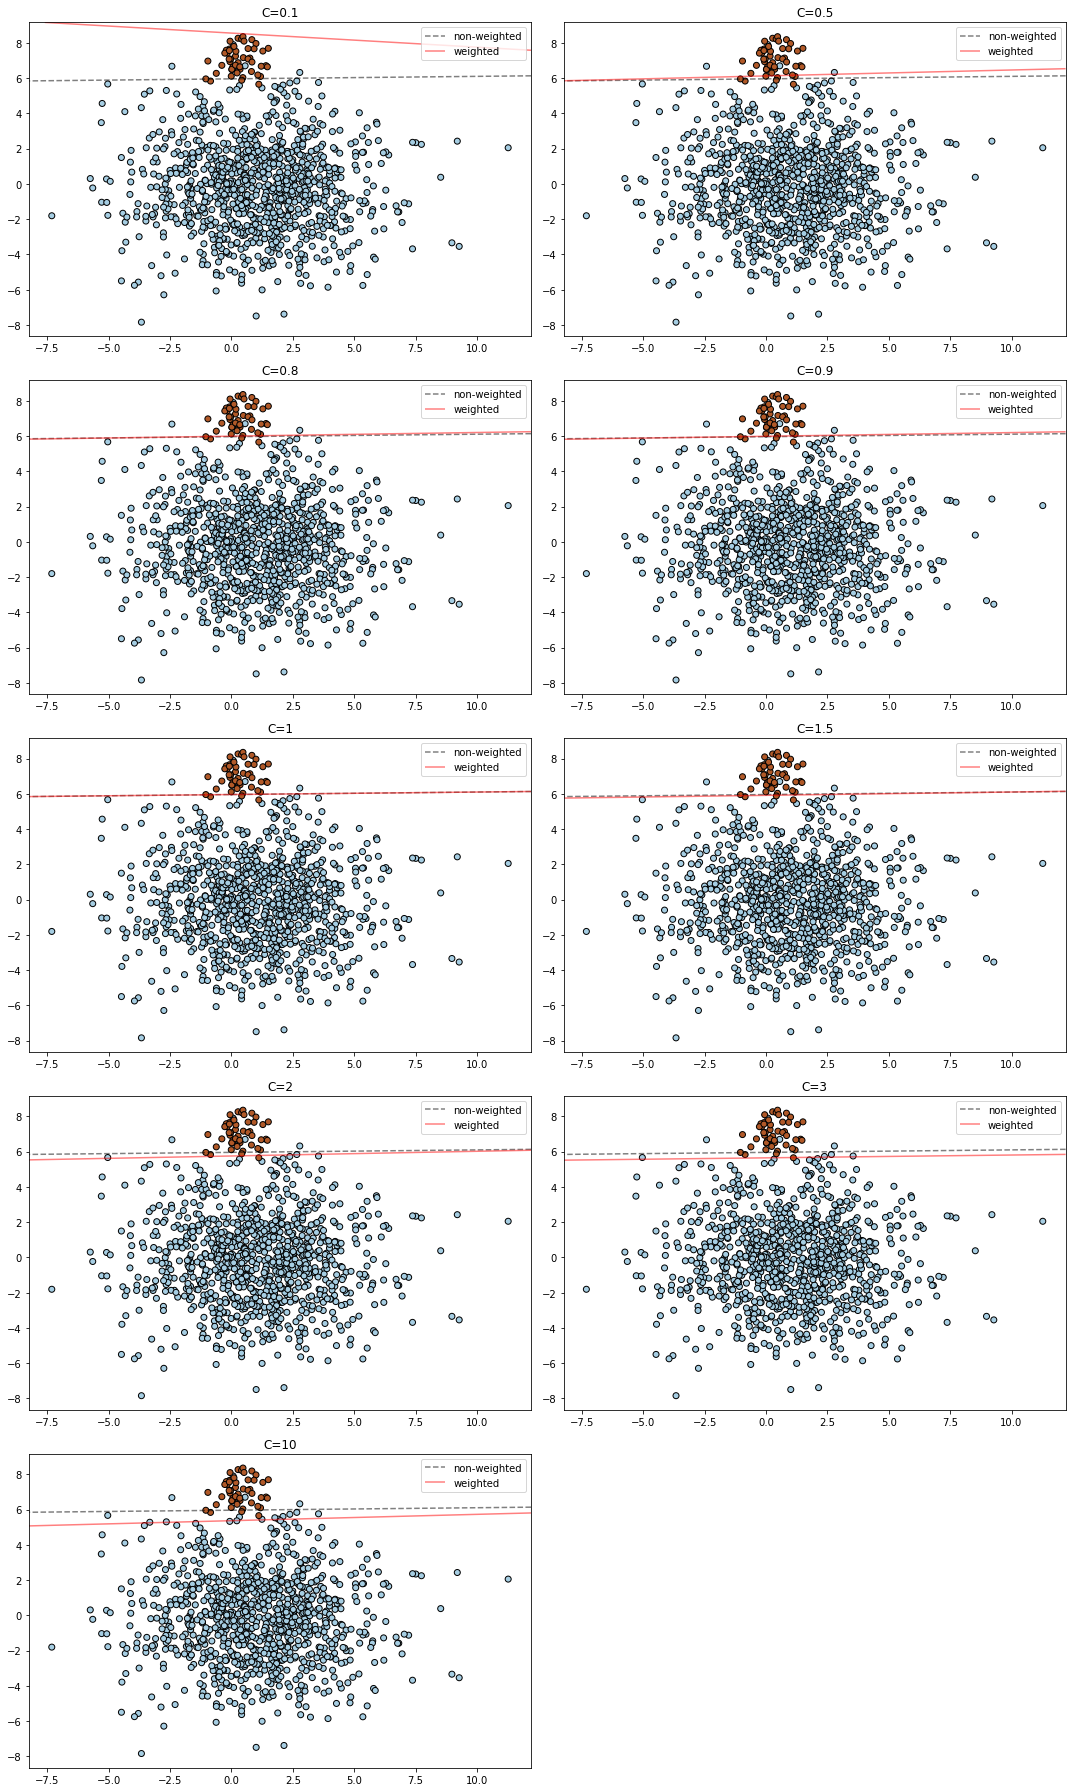

C:0.1,	train_acc:0.952	test_acc:0.952	f1_score:0.000000
C:0.5,	train_acc:0.988	test_acc:0.990	f1_score:0.896552
C:0.8,	train_acc:0.990	test_acc:0.994	f1_score:0.933333
C:0.9,	train_acc:0.990	test_acc:0.994	f1_score:0.933333
C:1,	train_acc:0.990	test_acc:0.997	f1_score:0.967742
C:1.5,	train_acc:0.990	test_acc:0.997	f1_score:0.967742
C:2,	train_acc:0.990	test_acc:0.997	f1_score:0.967742
C:3,	train_acc:0.989	test_acc:0.994	f1_score:0.937500
C:10,	train_acc:0.986	test_acc:0.981	f1_score:0.833333


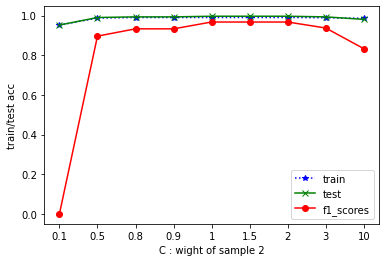

In [4]:
# SVM for reference
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

train_accs = []
test_accs = []
f1_scores = []

plt.figure(figsize=(15, 25))

# C
Cs = [0.1, 0.5, 0.8, 0.9, 1, 1.5, 2, 3, 10]


for i, C in enumerate(Cs):

    # SVM parameters setting : linear, C of sample_2
    lclf = svm.SVC(kernel='linear', class_weight={1:C})
    lclf.fit(X_train, y_train)

    # prediction
    y_train_pred = lclf.predict(X_train)
    y_test_pred = lclf.predict(X_test)

    # accuracy y & y (predict)
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc) 
    
    
    # f1-score
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))
        
    # confusion matrix
    print('confusion matrix (C: {}) \n {}'.format(C, metrics.confusion_matrix(y_test, y_test_pred)))   
    
    
    # figure size setting
    #plt.figure(figsize=(8, 4))
    # visualization
    plt.subplot(len(Cs)//2+1, 2,i+1)
    plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

    # figure setting
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 2)
    yy = np.linspace(ylim[0], ylim[1], 2)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # draw hyper plane between sample 1 and sample 2
    # C = 1.0 (for reference)
    Z = clf.decision_function(xy).reshape(XX.shape)
    a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['--'])

    # C = [0.1, 1, 2, 3, 5, 10]
    Z = lclf.decision_function(xy).reshape(XX.shape)
    b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])
    plt.title("C={}".format(C))

    plt.legend([a.collections[0], b.collections[0]], ["non-weighted", "weighted"], loc='upper right')
    
plt.tight_layout()    
plt.show()

# train / test accuracy and test f1-score
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.plot(f1_scores, 'ro-')
plt.legend(['train', 'test', 'f1_scores'])
plt.xticks(range(len(Cs)), Cs)
plt.xlabel("C : wight of sample 2")
plt.ylabel("train/test acc")

for i in range(len(Cs)):
    print("C:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}\tf1_score:{:.6f}".format(Cs[i], train_accs[i], test_accs[i], f1_scores[i]))


#### 2. circle dataset 에 rfb kernel 을 적용하고, parameter "C", "gamma" 를 이용하여 accuracy 와의 관계를 확인해 보자.

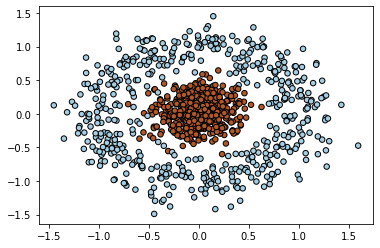

In [5]:
# generate circle dataset
X, y = datasets.make_circles(n_samples=1000, noise=0.2, factor=0.05)  # factor: Scale factor between inner and outer circle

# display
plt.scatter(X[:,0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')

# split train/test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

confusion matrix (C: 0.08) 
 [[149   1]
 [  5 145]]
confusion matrix (C: 0.1) 
 [[149   1]
 [  3 147]]
confusion matrix (C: 1) 
 [[149   1]
 [  1 149]]
confusion matrix (C: 1.2) 
 [[148   2]
 [  0 150]]
confusion matrix (C: 3) 
 [[145   5]
 [  0 150]]
confusion matrix (C: 5) 
 [[145   5]
 [  0 150]]
confusion matrix (C: 10) 
 [[142   8]
 [  0 150]]
confusion matrix (C: 100) 
 [[134  16]
 [  0 150]]


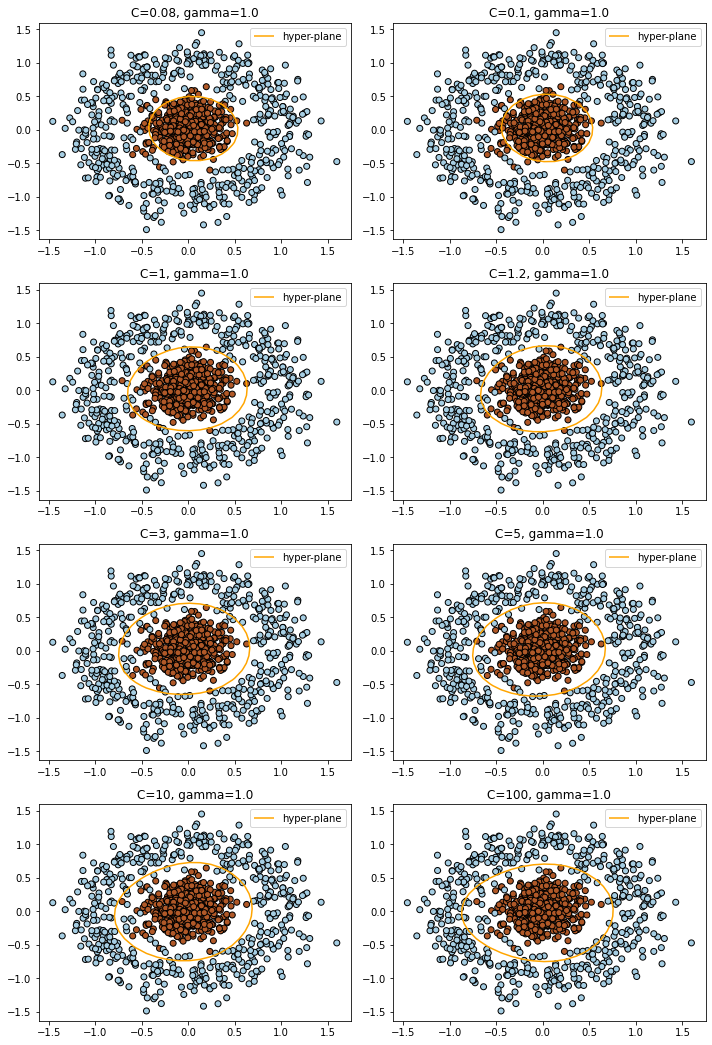

C:0.08,	train_acc:0.951	test_acc:0.980	f1_score:0.979730
C:0.1,	train_acc:0.961	test_acc:0.987	f1_score:0.986577
C:1,	train_acc:0.983	test_acc:0.993	f1_score:0.993333
C:1.2,	train_acc:0.983	test_acc:0.993	f1_score:0.993377
C:3,	train_acc:0.974	test_acc:0.983	f1_score:0.983607
C:5,	train_acc:0.974	test_acc:0.983	f1_score:0.983607
C:10,	train_acc:0.970	test_acc:0.973	f1_score:0.974026
C:100,	train_acc:0.960	test_acc:0.947	f1_score:0.949367


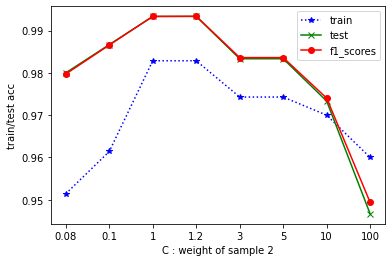

In [7]:
train_accs = []
test_accs = []
f1_scores = []

# Cs
Cs = [0.08, 0.1, 1, 1.2, 3, 5, 10, 100]
gamma=1.0

plt.figure(figsize=(10, 18))

for i, C in enumerate(Cs):
    
    # racial basis kernel 
    rbfclf = svm.SVC(kernel='rbf', class_weight={1:C}, gamma=gamma, random_state=1)
    rbfclf.fit(X_train, y_train)

    # prediction
    y_train_pred = rbfclf.predict(X_train)
    y_test_pred = rbfclf.predict(X_test)

    # accuracy score
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    # f1-score
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))
        
    # confusion matrix
    print('confusion matrix (C: {}) \n {}'.format(C, metrics.confusion_matrix(y_test, y_test_pred)))   
   

    # subplots
    plt.subplot(len(Cs)//2+1, 2,i+1)
    # visualization
    plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

    # figure setting
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # draw hyper-plane
    Z = rbfclf.decision_function(xy).reshape(XX.shape)
    a = ax.contour(XX, YY, Z, colors='orange', levels=[0], alpha=1.0, linestyles=['-'])
    plt.title("C={}, gamma={}".format(C, gamma))

    plt.legend([a.collections[0]], ["hyper-plane"], loc='upper right')
    
plt.tight_layout()
plt.show()

# accuracy graph
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.plot(f1_scores, 'ro-')
plt.legend(['train', 'test', 'f1_scores'])
plt.xticks(range(len(Cs)), Cs)
plt.xlabel("C : weight of sample 2")
plt.ylabel("train/test acc")

for i in range(len(Cs)):
    print("C:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}\tf1_score:{:.6f}".format(Cs[i], train_accs[i], test_accs[i], f1_scores[i]))


confusion matrix (gamma: 0.08) 
 [[134  16]
 [  0 150]]
confusion matrix (gamma: 0.1) 
 [[141   9]
 [  0 150]]
confusion matrix (gamma: 1) 
 [[149   1]
 [  1 149]]
confusion matrix (gamma: 3) 
 [[149   1]
 [  1 149]]
confusion matrix (gamma: 10.0) 
 [[149   1]
 [  0 150]]
confusion matrix (gamma: 100.0) 
 [[149   1]
 [  2 148]]


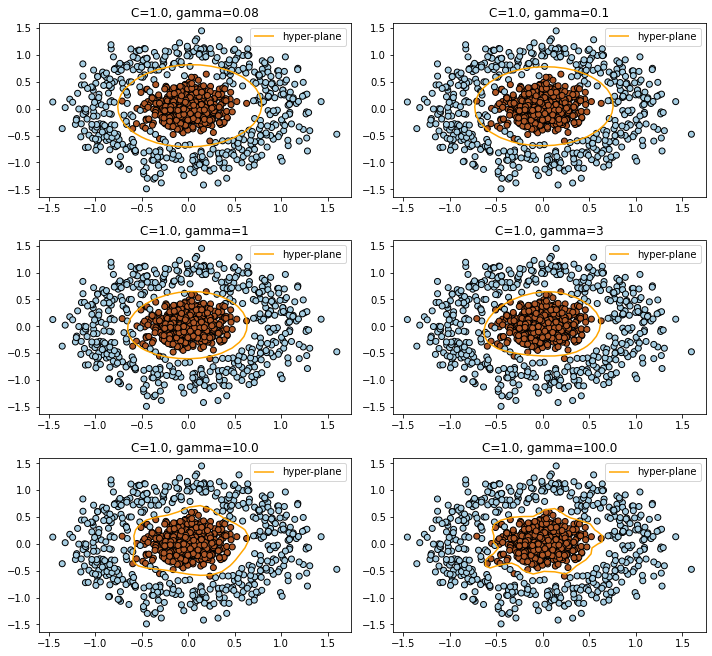

gamma:0.08,	train_acc:0.953	test_acc:0.947	f1_score:0.949367
gamma:0.1,	train_acc:0.966	test_acc:0.970	f1_score:0.970874
gamma:1,	train_acc:0.983	test_acc:0.993	f1_score:0.993333
gamma:3,	train_acc:0.980	test_acc:0.993	f1_score:0.993333
gamma:10.0,	train_acc:0.987	test_acc:0.997	f1_score:0.996678
gamma:100.0,	train_acc:0.993	test_acc:0.990	f1_score:0.989967


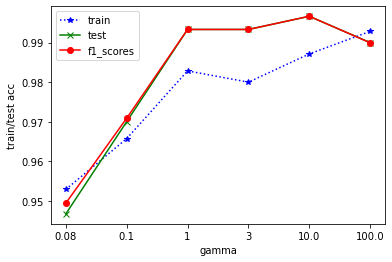

In [8]:
# SVM  

train_accs = []
test_accs = []
f1_scores = []

C = 1.0
gammas = [0.08, 0.1, 1, 3, 10.0, 100.0]

plt.figure(figsize=(10, 12))

for i, gamma in enumerate(gammas):

        # racial basis kernel
        rbfclf = svm.SVC(kernel='rbf', class_weight={1:C}, gamma=gamma, random_state=1)
        rbfclf.fit(X_train, y_train)

        # prediction
        y_train_pred = rbfclf.predict(X_train)
        y_test_pred = rbfclf.predict(X_test)

        # accuracy
        train_acc = metrics.accuracy_score(y_train, y_train_pred)
        test_acc = metrics.accuracy_score(y_test, y_test_pred)

        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # f1-score
        f1_scores.append(metrics.f1_score(y_test, y_test_pred))
        
        # confusion matrix
        print('confusion matrix (gamma: {}) \n {}'.format(gamma, metrics.confusion_matrix(y_test, y_test_pred)))   

        
        # subplots
        plt.subplot(len(gammas)//2+1, 2, i+1)
        # visualization
        plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

        # figure setting
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()        
        
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T

        # draw hyper plane
        Z = rbfclf.decision_function(xy).reshape(XX.shape)
        a = ax.contour(XX, YY, Z, colors='orange', levels=[0], alpha=1.0, linestyles=['-'])
        plt.title("C={}, gamma={}".format(C, gamma))

        plt.legend([a.collections[0]], ["hyper-plane"], loc='upper right')
       
plt.tight_layout()
plt.show()

# accuracy graph
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.plot(f1_scores, 'ro-')
plt.legend(['train', 'test', 'f1_scores'])
plt.xticks(range(len(gammas)), gammas)
plt.xlabel("gamma")
plt.ylabel("train/test acc")


for i in range(len(gammas)):
    print("gamma:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}\tf1_score:{:.6f}".format(gammas[i], train_accs[i], test_accs[i], f1_scores[i]))


#### 3. iris dataset 에 대해 SVM 을 이용한 classification 을 적용해 보자.

In [9]:
# load iris data 
iris = datasets.load_iris()

iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

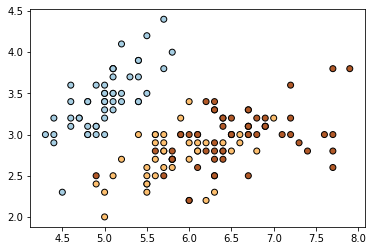

In [10]:
# load iris data 
iris = datasets.load_iris()

# feature 
X = iris.data[:, :2]
y = iris.target

# display
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

[[15  0  0]
 [ 0  6  9]
 [ 0  1 14]]
[[15  0  0]
 [ 0  6  9]
 [ 0  1 14]]
[[15  0  0]
 [ 0  6  9]
 [ 0  2 13]]
[[15  0  0]
 [ 0  7  8]
 [ 0  1 14]]
[[15  0  0]
 [ 0  6  9]
 [ 0  1 14]]


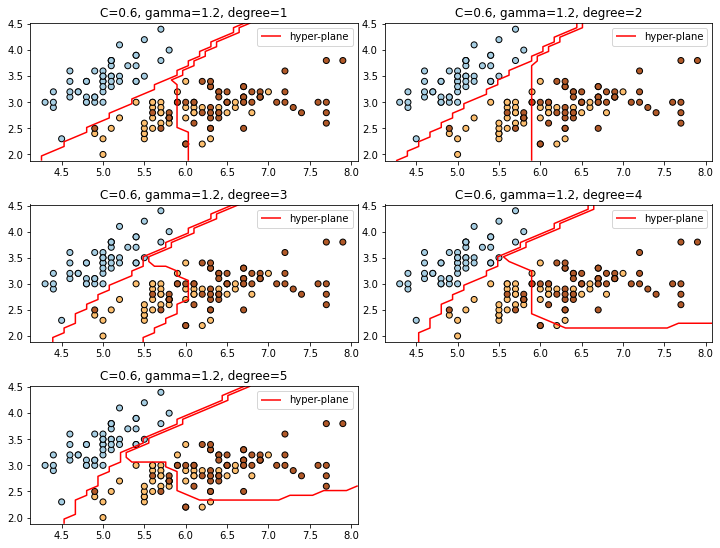

C:0.6,	gamma:1.2,	degree:1,	train_acc:0.800	test_acc:0.778	f1_score:0.760766
C:0.6,	gamma:1.2,	degree:2,	train_acc:0.800	test_acc:0.778	f1_score:0.760766
C:0.6,	gamma:1.2,	degree:3,	train_acc:0.819	test_acc:0.756	f1_score:0.741481
C:0.6,	gamma:1.2,	degree:4,	train_acc:0.800	test_acc:0.800	f1_score:0.788484
C:0.6,	gamma:1.2,	degree:5,	train_acc:0.810	test_acc:0.778	f1_score:0.760766


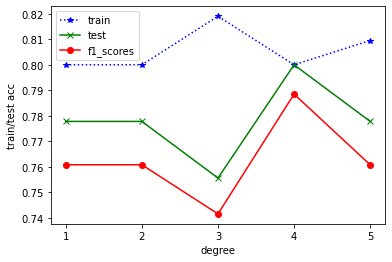

In [11]:
train_accs = []
test_accs = []
f1_scores = []

# parameters
C = 0.6
gamma = 1.2
degrees = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 10))

for i, degree in enumerate(degrees):

        # kernel : "poly"
        polyclf = svm.SVC(kernel='poly', class_weight={1:C}, gamma=gamma, degree=degree, random_state=1)
        # training
        polyclf.fit(X_train, y_train)

        # prediction
        y_train_pred = polyclf.predict(X_train)
        y_test_pred = polyclf.predict(X_test)

        # accuracy
        train_acc = metrics.accuracy_score(y_train, y_train_pred)
        test_acc = metrics.accuracy_score(y_test, y_test_pred)

        train_accs.append(train_acc)
        test_accs.append(test_acc)
        
        # f1-score
        f1_scores.append(metrics.f1_score(y_test, y_test_pred, average='weighted'))
        
        # confusion matrix
        print(metrics.confusion_matrix(y_test, y_test_pred))


        # subplot 
        plt.subplot(len(gammas)//2+1, 2, i+1)

        # visualization
        plt.scatter(X[:, 0], X[:,1], cmap=plt.cm.Paired, c=y, edgecolors='k')

        # figure setting
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()        
        
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T

        # draw hyper-plane
        Z = polyclf.predict(np.c_[xy])
        Z = Z.reshape(XX.shape)

        a = ax.contour(XX, YY, Z, colors=['r', 'r'], levels=[0, 1], alpha=1.0, linestyles=['-'])
        plt.title("C={}, gamma={}, degree={}".format(C, gamma, degree))

        plt.legend([a.collections[0]], ["hyper-plane"], loc='upper right')
        
plt.tight_layout()
plt.show()

# draw graph
plt.plot(train_accs, 'b*:')
plt.plot(test_accs, 'gx-')
plt.plot(f1_scores, 'ro-')
plt.legend(['train', 'test', 'f1_scores'])
plt.xticks(range(len(degrees)), degrees)
plt.xlabel("degree")
plt.ylabel("train/test acc")


for i in range(len(degrees)):
    print("C:{},\tgamma:{},\tdegree:{},\ttrain_acc:{:.3f}\ttest_acc:{:.3f}\tf1_score:{:.6f}".format(C, gamma, degrees[i], train_accs[i], test_accs[i], f1_scores[i]))
  

